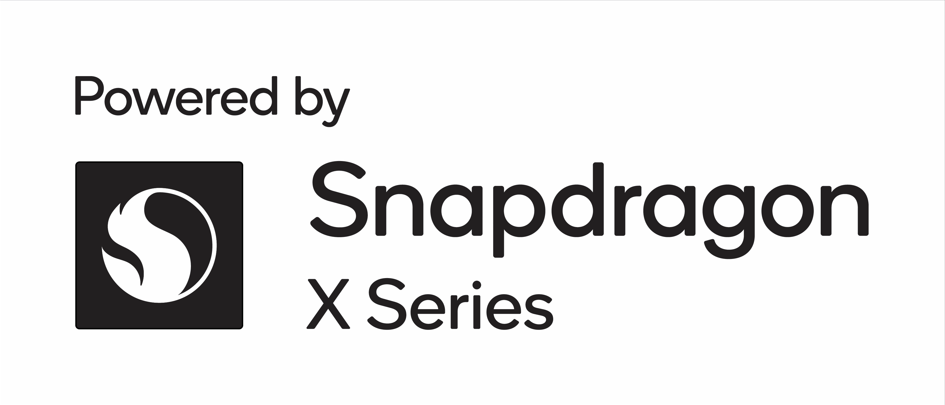

In [ ]:
import platform

arch = platform.machine()
sys = platform.system()
processor = platform.processor()
print(f"{arch}\n{sys}\n{processor}")

In [ ]:
import onnxruntime as ort
import os
import numpy as np
import time
import gc
import psutil

from pathlib import Path
from tokenizers import Tokenizer

In [ ]:
root_dir = Path.cwd().parent.parent
onnx_root = Path(ort.__file__).parent

In [ ]:
# Subdirectory where all .onnx dependencies are located
model_subdirectory = "qnn-deepseek-r1-distill-qwen-7b"

# The embeddings model is entry point, use netron to visualize
model_name = "deepseek_r1_7b_embeddings_quant_v1.0.onnx"

# This graph is used to process initial prompt, we can pass up to 64 tokens
context_model = "deepseek_r1_7b_ctx_v1.0.onnx_ctx.onnx"

# This graph is used to perform next word inference after the initial prompt
context_model_iter = "deepseek_r1_7b_iter_v1.0.onnx_ctx.onnx"

# This graph allows us to take hidden states and return logits
head_model = "deepseek_r1_7b_head_quant_v1.0.onnx"

# Tokenizer
tokenizer_json = "tokenizer.json"

In [ ]:
model_path = root_dir/"models"/model_subdirectory/model_name
ctx_path = root_dir/"models"/model_subdirectory/context_model
ctx_path_itr = root_dir/"models"/model_subdirectory/context_model_iter
head_path = root_dir/"models"/model_subdirectory/head_model
tokenizer_path = root_dir/"models"/model_subdirectory/tokenizer_json
hexagon_driver = onnx_root/"capi"/"QnnHtp.dll"

In [ ]:
model_path

In [ ]:
hexagon_driver

In [ ]:
model_path.is_file()

In [ ]:
hexagon_driver.is_file()